Name: EDEKEBON ELAIJAH
Reg_no.: 2023/HD05/04665U
Student no.: 2300704665


In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train_data.csv')

In [3]:

test_data = pd.read_csv('test_data.csv')

In [4]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [6]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [7]:
test_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


In [8]:
train_data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [9]:
test_data.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [10]:
# Define missing values
missing_values = ['   .', '>=10', 'nan']

# Reading datasets with specified missing values
train_data = pd.read_csv('train_data.csv', na_values=missing_values)
test_data = pd.read_csv('test_data.csv', na_values=missing_values)

# Impute missing values with the mean for numerical columns

numeric_cols_train = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_test = test_data.select_dtypes(include=['float64', 'int64']).columns

#  filling the numerical columns with mean value
train_data[numeric_cols_train] = train_data[numeric_cols_train].fillna(train_data[numeric_cols_train].mean(numeric_only=True))
test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].mean(numeric_only=True))

In [11]:
# Fill missing values for each categorical column with its mode
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

for column in categorical_columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

for column in categorical_columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [12]:
# encoding cateorical variables

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column in the list
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [13]:

print("\nUpdated Training Data Info:")
print(train_data.info())

print("\nUpdated Testing Data Info:")
print(test_data.info())


Updated Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   float64
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(4), int32(4), int64(4), object(2)
memory usage: 671.4+ KB
None



In [14]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_train = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_test = test_data.select_dtypes(include=['float64', 'int64']).columns

# these excludes the target variable 'Claim' from the numeric columns
numeric_cols_train = numeric_cols_train.drop('Claim', errors='ignore')

scaler = MinMaxScaler()

# Scale numeric columns

train_data[numeric_cols_train] = scaler.fit_transform(train_data[numeric_cols_train])

test_data[numeric_cols_test] = scaler.transform(test_data[numeric_cols_test])

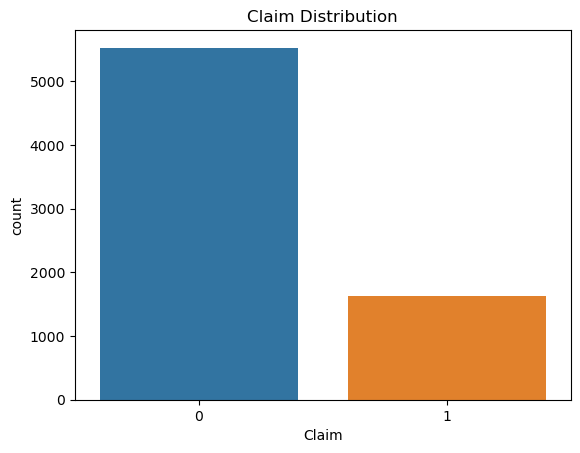

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of 'Claim'
sns.countplot(data=train_data, x='Claim')
plt.title('Claim Distribution')
plt.show()

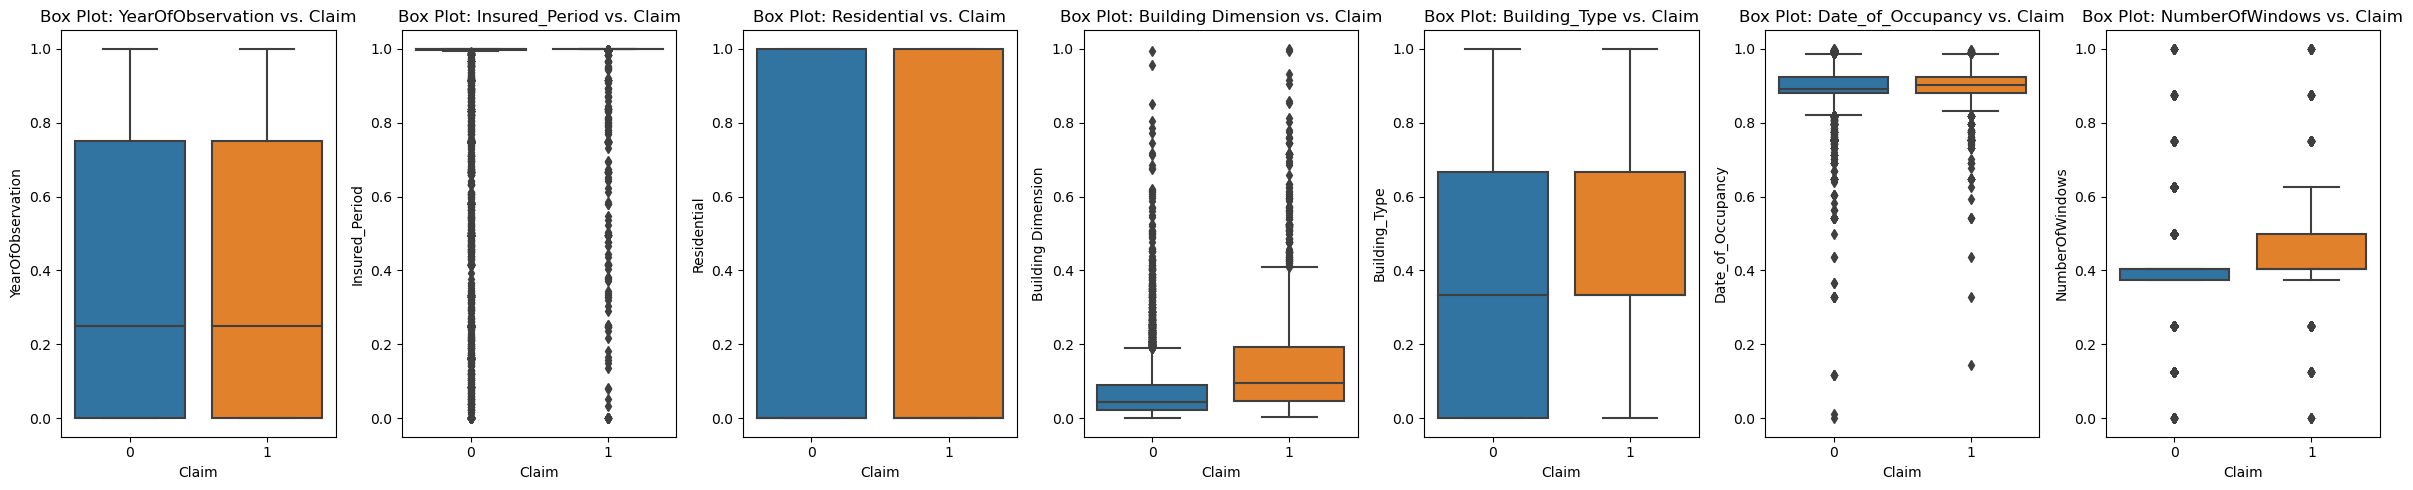

In [16]:
# plotting numerical features against target feature claim

numeric_features = ['YearOfObservation', 'Insured_Period', 'Residential',
                    'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows']

# Creation of a subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(24, 5))

# Plot box plots for each numeric feature against the target feature claim
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='Claim', y=feature, data=train_data, ax=axes[i])
    axes[i].set_xlabel('Claim')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'Box Plot: {feature} vs. Claim')

# Adjust layout
plt.tight_layout()
plt.show()

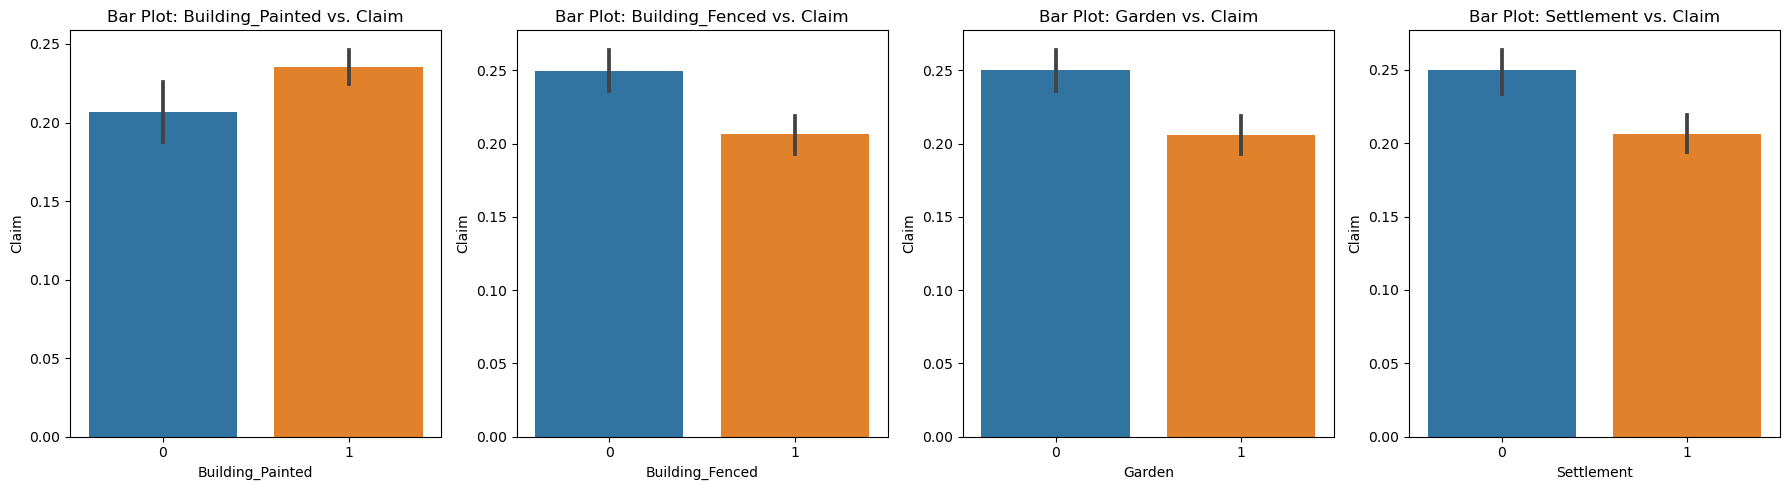

In [17]:
categorical_features = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

# Creating subplots with appropriate number of columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(18, 5))

# Plot bar plots for each categorical feature against the target variable
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y='Claim', data=train_data, ax=axes[i])
    axes[i].set_ylabel('Claim')
    axes[i].set_title(f'Bar Plot: {feature} vs. Claim')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
columns_to_drop = ['Customer Id', 'Geo_Code']
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop('Geo_Code', axis=1, inplace=True)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# separating the target feature(X) 'Claim' from the rest of the features(y)
X = train_data.drop('Claim', axis=1)
y = train_data['Claim']

# Original features before dropping columns
original_features = X.columns

# Dropping columns from train_data and test_data
columns_to_drop = ['Garden', 'Settlement', 'Building_Fenced']
X = X.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)


In [20]:
# Ensure that the feature names used during fitting match the updated feature names using an appropriate estimator in the randomforest classifier
estimator = RandomForestClassifier() 
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)


In [21]:
# Getting selected features using the original feature names
selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building Dimension', 'Building_Type',
       'Date_of_Occupancy', 'NumberOfWindows'],
      dtype='object')


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM model
svm_model = SVC(probability=True)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, scoring='roc_auc')
grid_search_svm.fit(X, y)
best_svm_model = grid_search_svm.best_estimator_

In [23]:
from sklearn.linear_model import LogisticRegression

# Linear Regression model
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid_knn, scoring='roc_auc')
grid_search_knn.fit(X, y)
best_knn_model = grid_search_knn.best_estimator_

In [25]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X, y)

GaussianNB()

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#  Predict probabilities for each model
svm_probs = best_svm_model.predict_proba(X)[:, 1]
lr_probs = lr_model.predict_proba(X)[:, 1]
knn_probs = best_knn_model.predict_proba(X)[:, 1]
nb_probs = nb_model.predict_proba(X)[:, 1]

In [27]:
# Computing AUC for each model
svm_auc = roc_auc_score(y, svm_probs)
lr_auc = roc_auc_score(y, lr_probs)
knn_auc = roc_auc_score(y, knn_probs)
nb_auc = roc_auc_score(y, nb_probs)

In [28]:
# Comparing the performance of different models
print(f'SVM AUC: {svm_auc}')
print(f'Linear Regression AUC: {lr_auc}')
print(f'KNN AUC: {knn_auc}')
print(f'Naive Bayes AUC: {nb_auc}')

SVM AUC: 0.7033485523646755
Linear Regression AUC: 0.7143121910399308
KNN AUC: 0.8171803615799086
Naive Bayes AUC: 0.6884886777583303


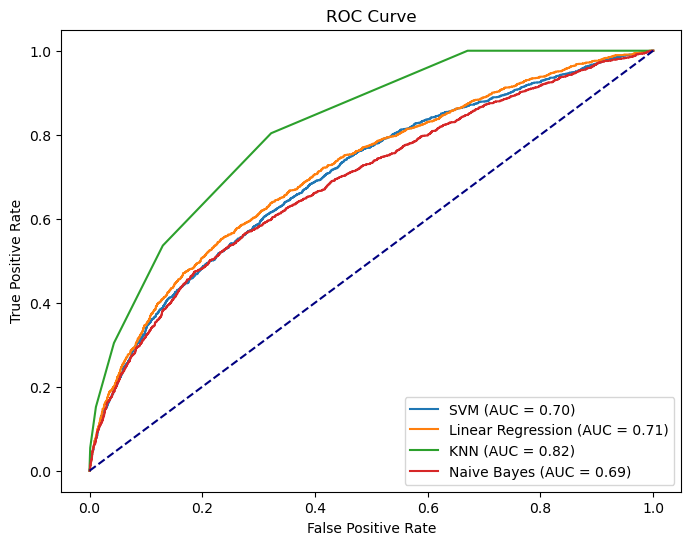

In [29]:
# Visualize the ROC curve for each model
fpr_svm, tpr_svm, _ = roc_curve(y, svm_probs)
fpr_lr, tpr_lr, _ = roc_curve(y, lr_probs)
fpr_knn, tpr_knn, _ = roc_curve(y, knn_probs)
fpr_nb, tpr_nb, _ = roc_curve(y, nb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression (AUC = {lr_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:

test_features = test_data[selected_features]

# predictions on the test dataset using the best-performing model wchich is KNN
test_probabilities = best_knn_model.predict_proba(test_features)[:, 1]

# threshold of 0.5 to convert probabilities to binary predictions
threshold = 0.5

 # thes code will Convert True/False to 1/0
test_predictions = (test_probabilities >= threshold).astype(int) 

# Creation of a DataFrame for submission
submission_df = pd.DataFrame({'Customer Id': test_data['Customer Id'], 'Claim': test_predictions})

# saving the submission file
submission_df.to_csv('submission.csv', index=False)